<a href="https://colab.research.google.com/github/y0ungminhada/python-da-insight/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-53-dd7bba46432e>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Region'] = filtered_data['Region'].map(district_mapping)


Principal Component 1: 0.5329
Principal Component 2: 0.1934
Principal Component 3: 0.1419
Principal Component 4: 0.0540
Principal Component 5: 0.0233
Principal Component 6: 0.0211
Principal Component 7: 0.0186
Principal Component 8: 0.0065
Principal Component 9: 0.0043
Principal Component 10: 0.0025
Principal Component 11: 0.0008
Principal Component 12: 0.0005
Principal Component 13: 0.0002
Principal Component 14: 0.0000
Principal Component 15: 0.0000
Principal Component 16: 0.0000


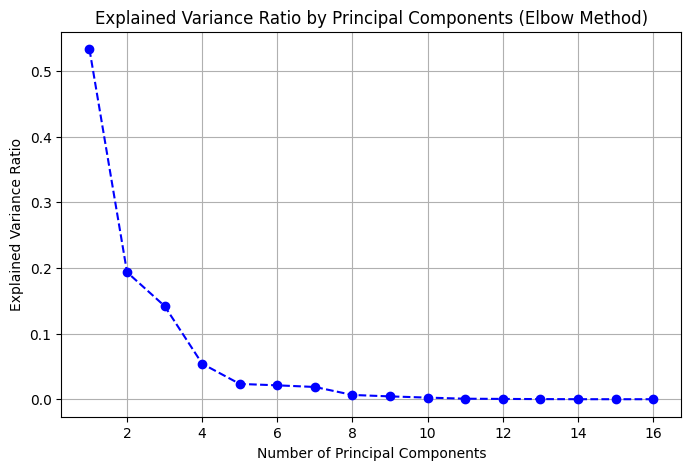

,Population,Business Opening Rate,Business Closing Rate,Number of Stores,Average Operating Period,Startup Survival Rate (1 Year),Startup Survival Rate (3 Years),Startup Survival Rate (5 Years),Annual Survival Rate (1 Year),Annual Survival Rate (3 Years),Annual Survival Rate (5 Years),Rent Price,Area,Bus Station,Subway Station,Population Density,Store Density,Business Opening Rate (%),Business Closing Rate (%)
PC1,0.059725,-0.056224,-0.069677,0.047674,0.305941,0.280728,0.305194,0.307592,0.279914,0.306913,0.302241,0.245732,-0.156593,-0.068072,0.203490,0.169635,0.213917,-0.264542,-0.294305
PC2,-0.006663,0.502234,0.499107,0.505444,-0.035531,0.007086,0.001801,0.007647,0.062843,0.012208,0.013768,0.138356,0.274743,0.150097,0.267978,-0.117141,0.167358,0.069193,0.044575
PC3,0.420159,0.049008,0.076557,0.053093,-0.062009,-0.245451,-0.119672,-0.102376,-0.160460,-0.102872,-0.140448,0.169906,-0.329711,-0.373528,0.131748,0.470989,0.365942,0.046978,0.122582


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_2018 = pd.read_csv('/content/drive/MyDrive/2018.csv', encoding='cp949')  # Use 'cp949' encoding
data_2019 = pd.read_csv('/content/drive/MyDrive/2019.csv', encoding='cp949')  # Use 'cp949' encoding
data_2020 = pd.read_csv('/content/drive/MyDrive/2020.csv', encoding='cp949')  # Use 'cp949' encoding
data_2021 = pd.read_csv('/content/drive/MyDrive/2021.csv', encoding='cp949')  # Use 'cp949' encoding
data_2022 = pd.read_csv('/content/drive/MyDrive/2022.csv', encoding='cp949')  # Use 'cp949' encoding
data_2023 = pd.read_csv('/content/drive/MyDrive/2023.csv', encoding='cp949')  # Use 'cp949' encoding
area = pd.read_csv('/content/drive/MyDrive/면적.csv')
transport=pd.read_csv('/content/drive/MyDrive/서울시_자치구별_교통카운트.csv',encoding='cp949')
# 필요한 연도 데이터와 면적 데이터를 결합하고 계산하는 함수 정의
def process_data(data, area, year):
    # 면적 데이터를 병합
    data = data.merge(area, on='지역')
    data = data.merge(transport, on='지역')

    # 밀도 및 비율 계산
    data['인구 밀도'] = data['인구수'] / data['면적']
    data['상점 밀도'] = data['점포수'] / data['면적']
    data['개업률 퍼센트'] = (data['개업률'] / data['점포수']) * 100
    data['폐업률 퍼센트'] = (data['폐업률'] / data['점포수']) * 100

    # 컬럼 이름 변경
    data = data.rename(columns=column_mapping)

    return data

# 각 연도별 데이터와 컬럼 이름 매핑 정의
column_mapping = {
    '지역': 'Region',
    '인구수': 'Population',
    '개업률': 'Business Opening Rate',
    '폐업률': 'Business Closing Rate',
    '점포수': 'Number of Stores',
    '평균영업기간': 'Average Operating Period',
    '신생기업_생존율_1년': 'Startup Survival Rate (1 Year)',
    '신생기업_생존율_3년': 'Startup Survival Rate (3 Years)',
    '신생기업_생존율_5년': 'Startup Survival Rate (5 Years)',
    '연차별_생존율_1년': 'Annual Survival Rate (1 Year)',
    '연차별_생존율_3년': 'Annual Survival Rate (3 Years)',
    '연차별_생존율_5년': 'Annual Survival Rate (5 Years)',
    '임대시세': 'Rent Price',
    '면적': 'Area',
    '인구 밀도': 'Population Density',
    '상점 밀도': 'Store Density',
    '개업률 퍼센트': 'Business Opening Rate (%)',
    '폐업률 퍼센트': 'Business Closing Rate (%)',
    '버스정류소' : 'Bus Station',
    '지하철역' : 'Subway Station'
}

# 연도별 데이터를 리스트에 저장
data_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]

# 각 연도 데이터를 루프를 통해 처리
processed_data_list = [process_data(data, area, year) for data, year in zip(data_list, range(2018, 2024))]

# 결과는 연도별로 처리된 데이터셋 리스트 (processed_data_list)에 저장됨
data_2018, data_2019, data_2020, data_2021, data_2022, data_2023 = processed_data_list


# 모든 연도 데이터를 하나의 데이터프레임으로 합침
all_years_data = pd.concat(processed_data_list)
all_years_data.head(1000)

# 'Region'별로 모든 컬럼의 평균을 계산
average_data_all_columns = all_years_data.groupby('Region').mean().reset_index()

def filter_data(data, quantile=0.25):
    # 상위 75% 기준 값 계산
    pop_density_threshold = data['Population Density'].quantile(quantile)
    store_density_threshold = data['Store Density'].quantile(quantile)

    # 필터링 수행
    filtered_data = data[
        (data['Population Density'] >= pop_density_threshold) &
        (data['Store Density'] >= store_density_threshold)
    ]
    return filtered_data

filtered_data = filter_data(average_data_all_columns, quantile=0.25)
filtered_data.head(25)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

district_mapping = {
    '종로구': 'Jongno-gu',
    '중구': 'Jung-gu',
    '용산구': 'Yongsan-gu',
    '성동구': 'Seongdong-gu',
    '광진구': 'Gwangjin-gu',
    '동대문구': 'Dongdaemun-gu',
    '중랑구': 'Jungnang-gu',
    '성북구': 'Seongbuk-gu',
    '강북구': 'Gangbuk-gu',
    '도봉구': 'Dobong-gu',
    '노원구': 'Nowon-gu',
    '은평구': 'Eunpyeong-gu',
    '서대문구': 'Seodaemun-gu',
    '마포구': 'Mapo-gu',
    '양천구': 'Yangcheon-gu',
    '강서구': 'Gangseo-gu',
    '구로구': 'Guro-gu',
    '금천구': 'Geumcheon-gu',
    '영등포구': 'Yeongdeungpo-gu',
    '동작구': 'Dongjak-gu',
    '관악구': 'Gwanak-gu',
    '서초구': 'Seocho-gu',
    '강남구': 'Gangnam-gu',
    '송파구': 'Songpa-gu',
    '강동구': 'Gangdong-gu'
}
# 'Region' 컬럼에 매핑 적용
filtered_data['Region'] = filtered_data['Region'].map(district_mapping)
# 수치형 데이터만 선택
numeric_data = filtered_data.select_dtypes(include=[np.number])

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# PCA 모델 초기화 (주성분 수를 많게 설정)
pca = PCA()
# 각 주성분의 설명된 분산 비율 출력

# 데이터를 PCA에 적합
pca.fit(scaled_data)

# 설명 분산 비율을 저장
explained_variance = pca.explained_variance_ratio_

# 주성분의 설명 분산 비율을 시각화 (엘보우 메소드용)
plt.figure(figsize=(8, 5))

# 설명 분산 비율을 바 형태로 표시
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b', label='Explained Variance')
for i, variance in enumerate(explained_variance, 1):
    print(f"Principal Component {i}: {variance:.4f}")
# 제목과 레이블 설정
plt.title('Explained Variance Ratio by Principal Components (Elbow Method)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 주성분의 고유벡터 (각 주성분의 구성 요소)
pca_components = pca.components_
# 첫 3개의 주성분만 출력
pca_components_df.iloc[:3]




# 평균 데이터 저장 (선택 사항)
#average_data.to_csv('/content/drive/MyDrive/6년_평균_데이터.csv', index=False, encoding='cp949')
